<a href="https://colab.research.google.com/github/ParsaKeerthana/DataMiningAssignment3/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
heart_data = pd.read_csv("/content/heart_failure_prediction.csv")

# Display the first few rows of the dataset
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


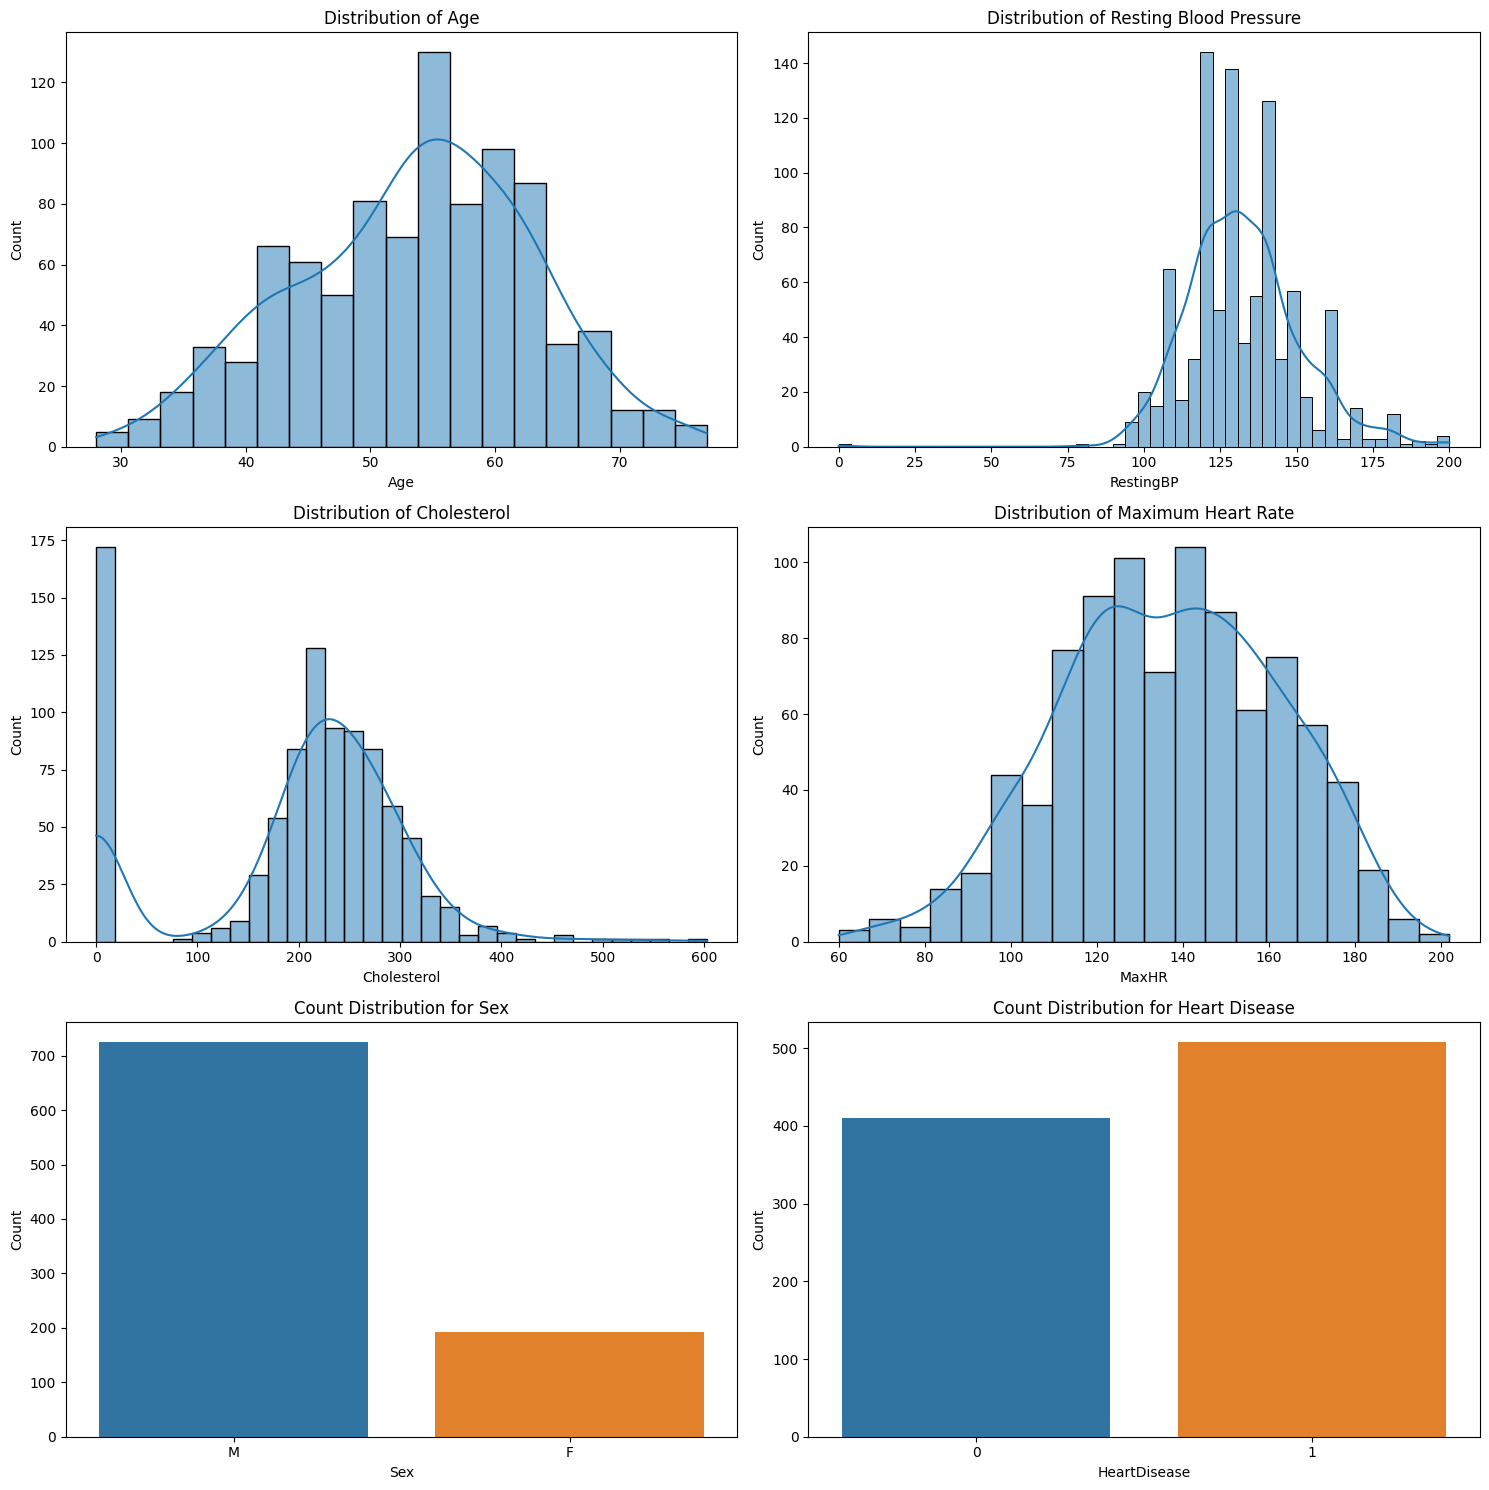

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Distribution of Age
sns.histplot(heart_data['Age'], kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Age')
ax[0, 0].set_xlabel('Age')
ax[0, 0].set_ylabel('Count')

# Distribution of RestingBP
sns.histplot(heart_data['RestingBP'], kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Resting Blood Pressure')
ax[0, 1].set_xlabel('RestingBP')
ax[0, 1].set_ylabel('Count')

# Distribution of Cholesterol
sns.histplot(heart_data['Cholesterol'], kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Cholesterol')
ax[1, 0].set_xlabel('Cholesterol')
ax[1, 0].set_ylabel('Count')

# Distribution of MaxHR
sns.histplot(heart_data['MaxHR'], kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Maximum Heart Rate')
ax[1, 1].set_xlabel('MaxHR')
ax[1, 1].set_ylabel('Count')

# Count distribution for Sex
sns.countplot(data=heart_data, x='Sex', ax=ax[2, 0])
ax[2, 0].set_title('Count Distribution for Sex')
ax[2, 0].set_xlabel('Sex')
ax[2, 0].set_ylabel('Count')

# Count distribution for HeartDisease
sns.countplot(data=heart_data, x='HeartDisease', ax=ax[2, 1])
ax[2, 1].set_title('Count Distribution for Heart Disease')
ax[2, 1].set_xlabel('HeartDisease')
ax[2, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


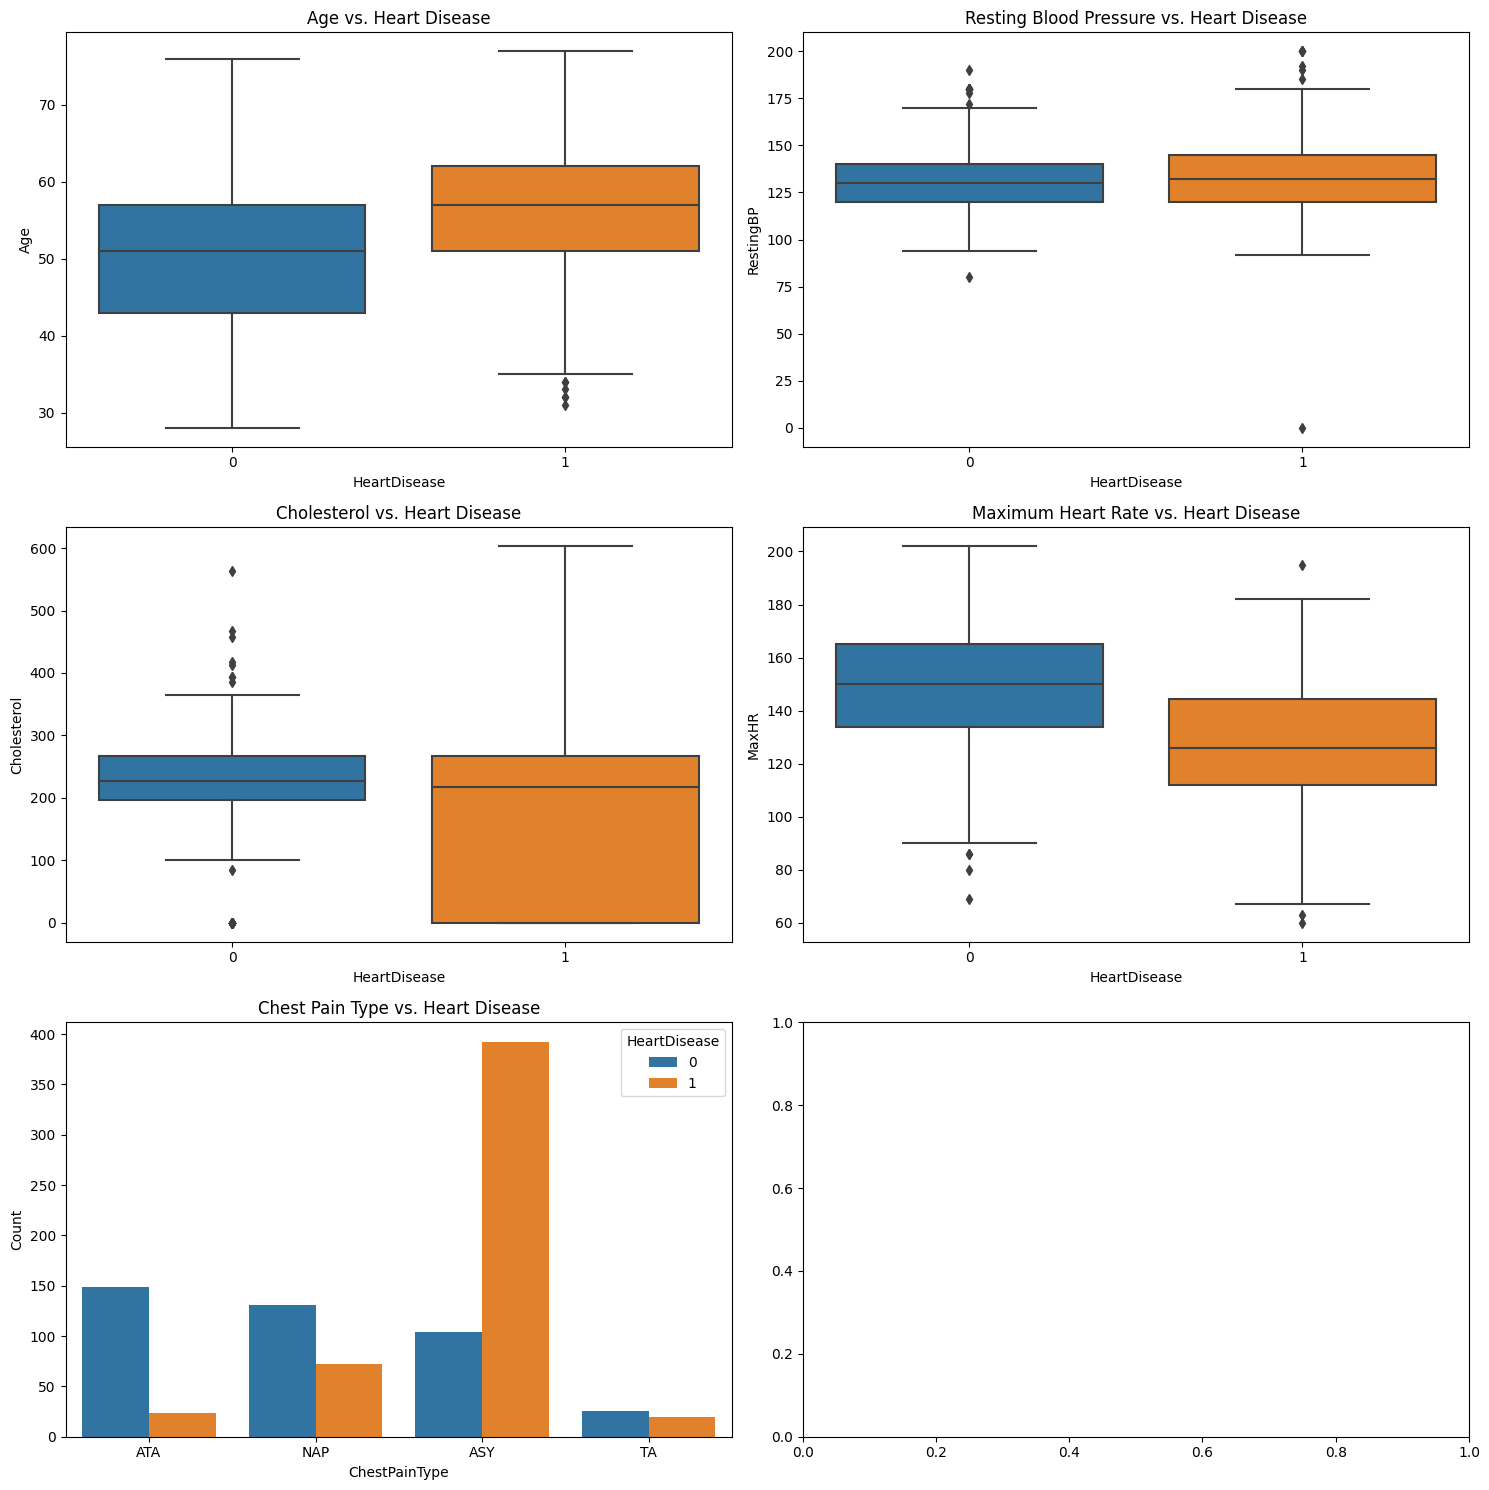

In [ ]:
# Set up the figure and axes
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Age vs. Heart Disease
sns.boxplot(data=heart_data, x='HeartDisease', y='Age', ax=ax[0, 0])
ax[0, 0].set_title('Age vs. Heart Disease')
ax[0, 0].set_xlabel('HeartDisease')
ax[0, 0].set_ylabel('Age')

# RestingBP vs. Heart Disease
sns.boxplot(data=heart_data, x='HeartDisease', y='RestingBP', ax=ax[0, 1])
ax[0, 1].set_title('Resting Blood Pressure vs. Heart Disease')
ax[0, 1].set_xlabel('HeartDisease')
ax[0, 1].set_ylabel('RestingBP')

# Cholesterol vs. Heart Disease
sns.boxplot(data=heart_data, x='HeartDisease', y='Cholesterol', ax=ax[1, 0])
ax[1, 0].set_title('Cholesterol vs. Heart Disease')
ax[1, 0].set_xlabel('HeartDisease')
ax[1, 0].set_ylabel('Cholesterol')

# MaxHR vs. Heart Disease
sns.boxplot(data=heart_data, x='HeartDisease', y='MaxHR', ax=ax[1, 1])
ax[1, 1].set_title('Maximum Heart Rate vs. Heart Disease')
ax[1, 1].set_xlabel('HeartDisease')
ax[1, 1].set_ylabel('MaxHR')

# Chest Pain Type vs. Heart Disease
sns.countplot(data=heart_data, x='ChestPainType', hue='HeartDisease', ax=ax[2, 0])
ax[2, 0].set_title('Chest Pain Type vs. Heart Disease')
ax[2, 0].set_xlabel('ChestPainType')
ax[2, 0].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# Encoding Categorical Variables

# One-hot encode categorical columns with multiple categories
heart_data_encoded = pd.get_dummies(heart_data, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

# Label encode binary categorical columns
heart_data_encoded['Sex'] = heart_data_encoded['Sex'].map({'M': 1, 'F': 0})
heart_data_encoded['ExerciseAngina'] = heart_data_encoded['ExerciseAngina'].map({'Y': 1, 'N': 0})

# Display the first few rows of the encoded dataset
heart_data_encoded.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1.5,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets (80% train, 20% test)
X = heart_data_encoded.drop('HeartDisease', axis=1)
y = heart_data_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((734, 15), (184, 15), (734,), (184,))

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the numerical columns that need to be scaled
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Display the first few rows of the scaled training data
X_train.head()


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
795,-1.245067,1,-0.708985,0.372803,1.842609,2.284353,0,-0.097061,0,1,0,1,0,0,0
25,-1.886236,1,-0.166285,0.086146,-0.542709,1.652241,0,-0.836286,0,1,0,1,0,0,1
84,0.250993,1,0.919115,0.123134,1.842609,-0.441628,1,0.087745,0,0,0,1,0,1,0
10,-1.779375,0,-0.166285,0.104640,-0.542709,0.229991,0,-0.836286,0,1,0,1,0,0,1
344,-0.283314,1,-0.708985,-1.846478,1.842609,-1.271274,0,-0.836286,0,0,0,1,0,1,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_clf.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_clf.feature_importances_

# Create a dataframe for feature importances
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the dataframe by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

features_df


,Feature,Importance
14,ST_Slope_Up,0.150243
13,ST_Slope_Flat,0.114157
7,Oldpeak,0.112748
3,Cholesterol,0.105987
5,MaxHR,0.102152
6,ExerciseAngina,0.091915
0,Age,0.084912
2,RestingBP,0.067954
8,ChestPainType_ATA,0.045535
1,Sex,0.041379


In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.9 MB/s eta 0:

In [ ]:
from pycaret.classification import *

# Set up the environment in pycaret
clf1 = setup(data=heart_data_encoded, target='HeartDisease', session_id=42)

,Description,Value
0,Session id,42
1,Target,HeartDisease
2,Target type,Binary
3,Original data shape,"(918, 16)"
4,Transformed data shape,"(918, 16)"
5,Transformed train set shape,"(642, 16)"
6,Transformed test set shape,"(276, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8536,0.9180,0.9043,0.8464,0.8720,0.7014,0.7094,0.2450
nb,Naive Bayes,0.8489,0.9132,0.8701,0.8594,0.8637,0.6940,0.6963,0.0310
et,Extra Trees Classifier,0.8489,0.9134,0.8928,0.8461,0.8670,0.6923,0.6979,0.3740
lr,Logistic Regression,0.8474,0.9161,0.8731,0.8561,0.8635,0.6905,0.6930,1.4690
gbc,Gradient Boosting Classifier,0.8442,0.9151,0.8705,0.8577,0.8605,0.6840,0.6909,0.2490
ridge,Ridge Classifier,0.8411,0.0000,0.8673,0.8499,0.8576,0.6778,0.6799,0.0320
lda,Linear Discriminant Analysis,0.8411,0.9181,0.8673,0.8499,0.8576,0.6778,0.6799,0.0640
xgboost,Extreme Gradient Boosting,0.8411,0.9100,0.8762,0.8470,0.8592,0.6771,0.6829,0.1190
qda,Quadratic Discriminant Analysis,0.8365,0.9036,0.8340,0.8697,0.8497,0.6707,0.6745,0.0340
lightgbm,Light Gradient Boosting Machine,0.8365,0.9128,0.8789,0.8387,0.8566,0.6668,0.6721,0.1640


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8308,0.9310,0.8611,0.8378,0.8493,0.6564,0.6567
1,0.8462,0.9358,1.0000,0.7826,0.8780,0.6779,0.7161
2,0.8438,0.9559,0.7778,0.9333,0.8485,0.6899,0.7022
3,0.8594,0.9152,0.9444,0.8293,0.8831,0.7085,0.7180
4,0.9062,0.9395,0.9167,0.9167,0.9167,0.8095,0.8095
5,0.9062,0.9507,0.9429,0.8919,0.9167,0.8097,0.8113
6,0.8594,0.9296,0.9143,0.8421,0.8767,0.7137,0.7170
7,0.8750,0.9458,0.9429,0.8462,0.8919,0.7448,0.7509
8,0.7656,0.8453,0.8286,0.7632,0.7945,0.5229,0.5253


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_model = tune_model(rf_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8308,0.9253,0.8889,0.8205,0.8533,0.6541,0.6570
1,0.8615,0.9224,1.0000,0.8000,0.8889,0.7111,0.7428
2,0.8750,0.9603,0.8333,0.9375,0.8824,0.7500,0.7559
3,0.8906,0.9276,0.9444,0.8718,0.9067,0.7751,0.7787
4,0.8750,0.9494,0.9167,0.8684,0.8919,0.7440,0.7455
5,0.9219,0.9507,1.0000,0.8750,0.9333,0.8400,0.8510
6,0.8594,0.9379,0.9143,0.8421,0.8767,0.7137,0.7170
7,0.9062,0.9379,0.9429,0.8919,0.9167,0.8097,0.8113
8,0.7656,0.8443,0.8286,0.7632,0.7945,0.5229,0.5253


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
final_model = finalize_model(tuned_model)

In [ ]:
predictions = predict_model(final_model, data=heart_data_encoded)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8998,0.9676,0.9331,0.8910,0.9115,0.7961,0.7972
